In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [34]:
threshold_value = 10

cap = cv2.VideoCapture('/home/kukushkin/imslowfast/dataset/videos/32433825.mp4')
ret, background = cap.read()

# Resize the frame
background = cv2.resize(background, (320, 256))

while cap.isOpened():
    ret, frame = cap.read()


    if not ret:
        break

    # frame resize
    frame = cv2.resize(frame, (320, 256))
    # Compute the absolute difference
    diff = cv2.absdiff(background, frame)
    # Convert the difference to grayscale
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to detect movement
    _, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)

    print(f"sum of white pixels: {np.sum(thresh)}")
    
    # If the number of white pixels is low, it's likely a background frame
    if np.sum(thresh) < threshold_value:
    #    background = frame
        print('Background updated')

cap.release()

#



sum of white pixels: 2550
sum of white pixels: 15555
sum of white pixels: 47940
sum of white pixels: 55335
sum of white pixels: 55335
sum of white pixels: 55335
sum of white pixels: 18360
sum of white pixels: 4845
sum of white pixels: 6375
sum of white pixels: 16320
sum of white pixels: 56610
sum of white pixels: 57375
sum of white pixels: 74970
sum of white pixels: 81855
sum of white pixels: 63240
sum of white pixels: 53805
sum of white pixels: 53040
sum of white pixels: 58905
sum of white pixels: 66555
sum of white pixels: 79305
sum of white pixels: 98430
sum of white pixels: 104295
sum of white pixels: 101235
sum of white pixels: 92565
sum of white pixels: 80325
sum of white pixels: 87975
sum of white pixels: 106335
sum of white pixels: 119850
sum of white pixels: 124695
sum of white pixels: 124950
sum of white pixels: 108120
sum of white pixels: 110925
sum of white pixels: 117045
sum of white pixels: 150450
sum of white pixels: 173910
sum of white pixels: 184110
sum of white pixels

In [35]:
background.shape

(256, 320, 3)

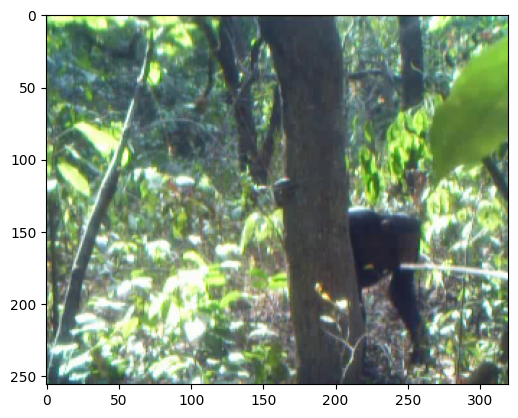

In [36]:
# show image with matplotlib
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

In [20]:
import numpy as np

#n = 6
#A = np.random.random((n,n))
#A = np.array([[0.8, 0.1, 0.05, 0.01, 0.02], [0.2, 0.1, 0.5, 0.01, 0.2], [0.1, 0.8, 0.0, 0.00, 0.1], [0.3, 0.6, 0.0, 0.00, 0.1], [0.0, 0.2, 0.0, 0.80, 0.0],  [0.2, 0.1, 0.5, 0.01, 0.2]])
#A_iter = A.copy()



In [33]:
def sinkhorn_knopp(A, max_iter=1000, tol=1e-6, row_sums=None, col_sums=None):
    """
    Sinkhorn-Knopp algorithm for non-square matrices to normalize rows and columns to target sums.
    
    Parameters:
    A: np.array, the non-square matrix to be normalized
    max_iter: int, maximum number of iterations (default 1000)
    tol: float, tolerance for convergence (default 1e-6)
    row_sums: np.array, target row sums (default None, implying all ones)
    col_sums: np.array, target column sums (default None, implying all ones)
    
    Returns:
    np.array, the doubly normalized matrix
    """
    
    # Initialize the row and column sums to ones if not provided
    if row_sums is None:
        row_sums = np.ones(A.shape[0])
    if col_sums is None:
        col_sums = np.ones(A.shape[1])
    
    # Initialize scaling factors for rows and columns
    r = np.ones(A.shape[0])
    c = np.ones(A.shape[1])
    
    # Iterative scaling
    for i in range(max_iter):
        # Scale rows to match row_sums
        r_old = r.copy()
        r = row_sums / (A @ c)
        
        # Scale columns to match col_sums
        c_old = c.copy()
        c = col_sums / (A.T @ r)
        
        # Convergence check
        if np.max(np.abs(r - r_old)) < tol and np.max(np.abs(c - c_old)) < tol:
            break
    
    # Return the doubly normalized matrix
    return np.diag(r) @ A @ np.diag(c)

# Example usage:
A = np.random.rand(4, 6)  # A non-square matrix
normalized_A = sinkhorn_knopp(A)
print("Normalized matrix:\n", normalized_A)

Normalized matrix:
 [[0.17046054 0.2004869  0.35942974 0.2645671  0.4122896  0.09276612]
 [0.38029302 0.37767492 0.21911463 0.00347061 0.09114658 0.42830025]
 [0.08089278 0.25034042 0.26911783 0.36128049 0.39056125 0.14780723]
 [0.36835365 0.17149776 0.1523378  0.37068181 0.10600257 0.33112641]]


In [28]:

A_normalised = D1.dot(A.dot(D2))
print(A_normalised)

[[0.13123672 0.04412019 0.26650037 0.22480938]
 [0.03766931 0.24409702 0.13938116 0.24551917]
 [0.25401457 0.15865809 0.18320167 0.07079233]
 [0.19485534 0.25918852 0.14092647 0.07169634]
 [0.10612476 0.24208379 0.14964747 0.16881065]
 [0.2760993  0.05185239 0.12034285 0.21837214]]
